In [1]:
import plotly.express as px
import plotly.graph_objects as go
from pyplanemono_minimal.elements import *
#import matplotlib.pyplot as plt

#%matplotlib widget

No arguments given, plane at origin with normal (0, 0, 1) initialised! Tread carefully!


In [15]:
pgm = PGM(mirror=Plane_Mirror(), grating = Grating())
pgm.energy = 1200
pgm.cff=1.4
pgm.grating.compute_angles()
pgm.set_theta()
mirror_corners = pgm.mirror.compute_corners()
grating_corners = pgm.grating.compute_corners()
rays = pgm.generate_rays()
_ = pgm.propagate(pgm.rays)
mirror_z = np.array(
    [mirror_corners[i][2] for i in [4,6,2,0,4]]
)
mirror_x = np.array(
    [mirror_corners[i][1] for i in [4,6,2,0,4]]
)

grating_z = np.array(
    [grating_corners[i][2] for i in [4,6,2,0,4]]
)
grating_x = np.array(
    [grating_corners[i][1] for i in [4,6,2,0,4]]
)
ray1z = [pgm.rays[0].position.list[2],
         pgm.mirror_intercept[0].z,
         pgm.grating_intercept[0].z,
         1000]

ray1x = [pgm.rays[0].position.list[1],
         pgm.mirror_intercept[0].y,
         pgm.grating_intercept[0].y,
         0]
ray2z = [pgm.rays[1].position.list[2],
         pgm.mirror_intercept[1].z,
         pgm.grating_intercept[1].z,
         1000]

ray2x = [pgm.rays[1].position.list[1],
         pgm.mirror_intercept[1].y,
         pgm.grating_intercept[1].y,
         pgm.grating_intercept[1].y + 1000*pgm.rays[1].vector[1]]

ray3z = [pgm.rays[2].position.list[2],
         pgm.mirror_intercept[2].z,
         pgm.grating_intercept[2].z,
         1000]

ray3x = [pgm.rays[2].position.list[1],
         pgm.mirror_intercept[2].y,
         pgm.grating_intercept[2].y,
         pgm.grating_intercept[2].y + 1000*pgm.rays[2].vector[1]]

2400 1 600 2 5.166008268050012e-10
1200 1 600 1.4 1.0332016536100023e-09


In [16]:
pgm.mirror_intercept[0].x

0.0

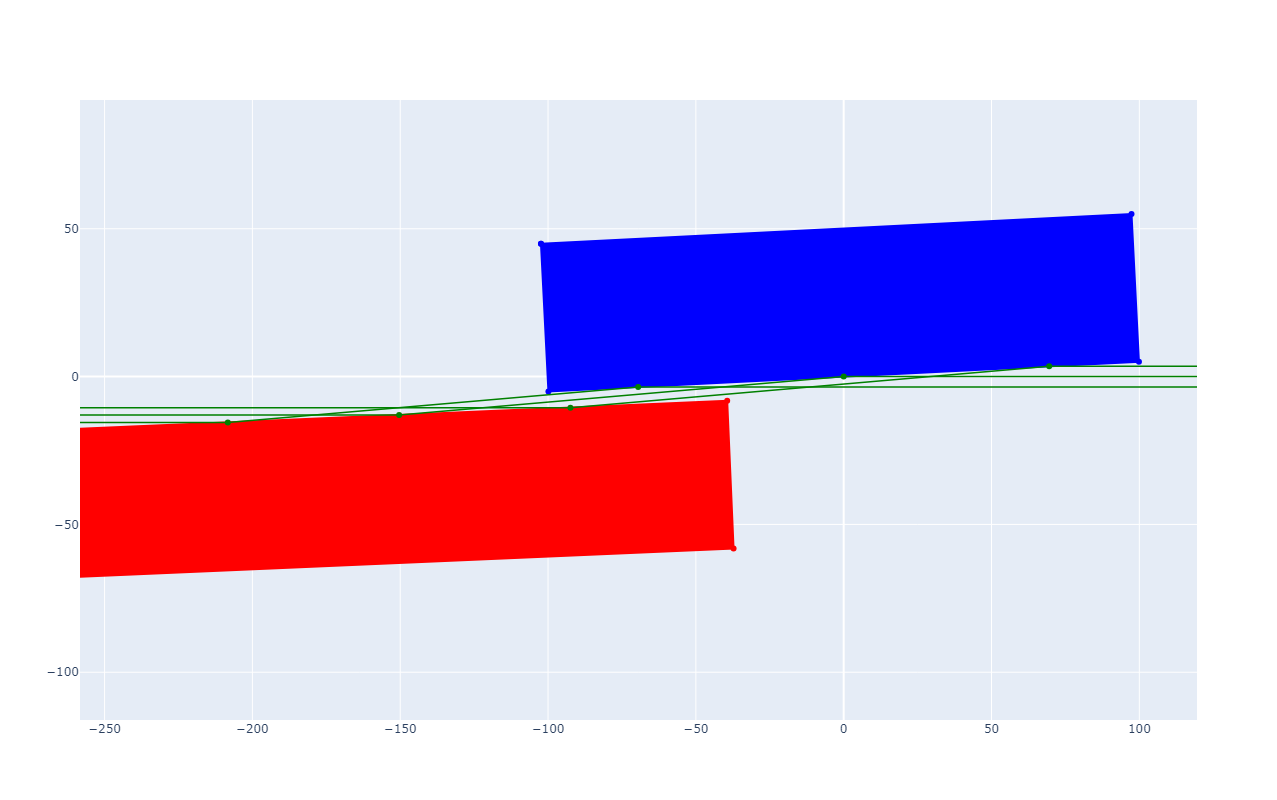

In [37]:
fig = go.Figure(layout={'showlegend':False, 'xaxis':{'range':(min(ray3z[1:])-50,max(ray2z[1:-1])+50),}, 'height':800})
fig.add_trace(go.Scatter(x=mirror_z, y=mirror_x,fill='toself',fillcolor='red',line={"color":'red'}, marker={'size':0}, name='Mirror'))
fig.add_trace(go.Scatter(x=grating_z, y=grating_x,fill='toself',fillcolor='blue',line={"color":'blue'}, marker={'size':0}, name='Grating')) #mode lines if to hide vertices
fig.update_yaxes(scaleanchor="x",scaleratio=1,)

fig.add_trace(go.Scatter(x=ray1z, y = ray1x, line={'color':'green', 'width':1.5}))
fig.add_trace(go.Scatter(x=ray2z, y = ray2x, line={'color':'green', 'width':1.5}))
fig.add_trace(go.Scatter(x=ray3z, y = ray3x, line={'color':'green', 'width':1.5}))




In [ ]:
fig = go.Figure(layout={'showlegend':False, 'xaxis':{'range':(min(ray3z[1:])-50,max(ray2z[1:-1])+50),}, 'height':800})
fig.add_trace(go.Scatter(x=mirror_z, y=mirror_x,fill='toself',fillcolor='red',line={"color":'red'}, marker={'size':0}, name='Mirror'))
fig.add_trace(go.Scatter(x=grating_z, y=grating_x,fill='toself',fillcolor='blue',line={"color":'blue'}, marker={'size':0}, name='Grating')) #mode lines if to hide vertices
fig.update_yaxes(scaleanchor="x",scaleratio=1,)

fig.add_trace(go.Scatter(x=ray1z, y = ray1x, line={'color':'green', 'width':1.5}))
fig.add_trace(go.Scatter(x=ray2z, y = ray2x, line={'color':'green', 'width':1.5}))
fig.add_trace(go.Scatter(x=ray3z, y = ray3x, line={'color':'green', 'width':1.5}))


2400 1 600 2 5.166008268050012e-10
1200 1 600 1.4 1.0332016536100023e-09


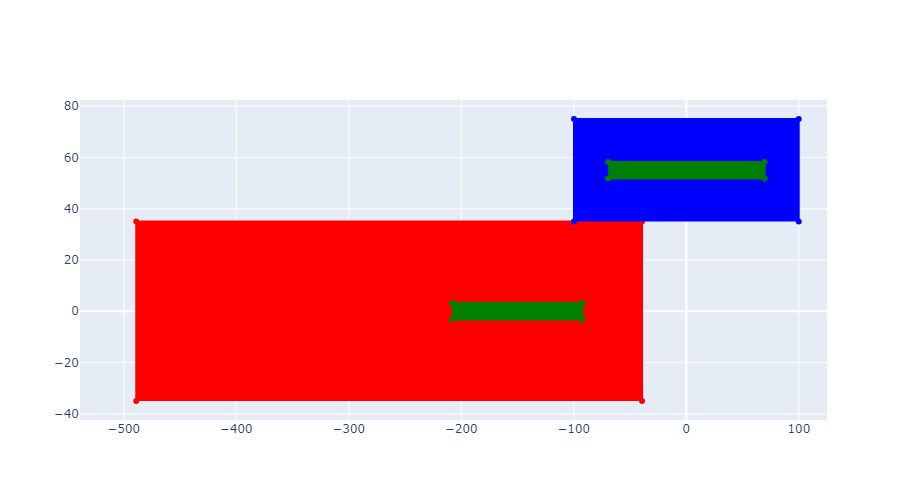

In [48]:
pgm = PGM(mirror=Plane_Mirror(), grating = Grating())
pgm.energy = 1200
pgm.cff=1.4
pgm.grating.compute_angles()
pgm.set_theta()
m_corners = pgm.mirror_corners()
g_corners = pgm.grating_corners()
m_corners = np.array(m_corners)
grating_corners = np.array(pgm.grating_corners())
mirror_corners = np.array(pgm.mirror_corners())
pgm.generate_rays()
_, mirror_int_1, grating_int_1 =  pgm.propagate(pgm.rays[1])
_, mirror_int_2, grating_int_2 =  pgm.propagate(pgm.rays[2])
_, mirror_int_3, grating_int_3 =  pgm.propagate(pgm.rays[3])
_, mirror_int_4, grating_int_4 =  pgm.propagate(pgm.rays[4])

mirror_intercepts = [
    mirror_int_1[0].to_point(),
    mirror_int_2[0].to_point(),
    mirror_int_3[0].to_point(),
    mirror_int_4[0].to_point()
]

grating_intercepts = [
    grating_int_1[0].to_point(),
    grating_int_2[0].to_point(),
    grating_int_3[0].to_point(),
    grating_int_4[0].to_point()
]

mirror_footprint_width, mirror_footprint_height = pgm.calc_footprint_size(mirror_intercepts)
grating_footprint_width, grating_footprint_height = pgm.calc_footprint_size(grating_intercepts)
#print("Mirror footprint width:", mirror_footprint_width)
# print("Mirror footprint height:", mirror_footprint_height)
#print("Grating footprint width:", grating_footprint_width)
# print("Grating footprint height:", grating_footprint_height)

mirr_footprint_corners = np.array([
    [mirror_int_2[0].z, mirror_int_3[0].x],
    [mirror_int_1[0].z, mirror_int_3[0].x],
    [mirror_int_1[0].z, mirror_int_4[0].x],
    [mirror_int_2[0].z, mirror_int_4[0].x]
])

grating_footprint_corners = np.array([
    [grating_int_2[0].z, grating_int_3[0].x],
    [grating_int_1[0].z, grating_int_3[0].x],
    [grating_int_1[0].z, grating_int_4[0].x],
    [grating_int_2[0].z, grating_int_4[0].x]
])

offset = 0.5*(pgm.mirror._width() + pgm.grating._width())* np.array([
    [0,1],
    [0,1],
    [0,1],
    [0,1]
])

grating_corners = grating_corners + offset
grating_footprint_corners = grating_footprint_corners + offset

fig = go.Figure(layout={'showlegend':False, 'xaxis':{'range':(min(mirror_corners[:,0])-50,max(grating_corners[:,1])+50)}, 'height':500})
fig.add_trace(go.Scatter(x=mirror_corners[:,0], y=mirror_corners[:,1],fill='toself',fillcolor='red',line={"color":'red'}, marker={'size':0}, name='Mirror'))
fig.add_trace(go.Scatter(x=grating_corners[:,0], y=grating_corners[:,1],fill='toself',fillcolor='blue',line={"color":'blue'}, marker={'size':0}, name='Grating'))
fig.add_trace(go.Scatter(x=mirr_footprint_corners[:,0], y=mirr_footprint_corners[:,1],fill='toself',fillcolor='green',line={"color":'green'}, marker={'size':0}, name='Beam Footprint on Mirror'))
fig.add_trace(go.Scatter(x=grating_footprint_corners[:,0], y=grating_footprint_corners[:,1],fill='toself',fillcolor='green',line={"color":'green'}, marker={'size':0}, name='Beam Footprint on Grating'))